
Se realiza la carga de datos del archivo de base de datos "Base de Datos Ventilador de Máquinas subido al foro", se realiza un par de modificaciones para poder leer los datos



In [ ]:
head(datos_motor)

Date/Time;Potencia Activa;Potencia reactiva;Corriente fase 1 ;Voltaje fase 1;Factor de potencia total
<chr>
"01-08-2023 0:00;157;739,5269;451,3704;229,575;0.903254628181458"
"01-08-2023 0:15;162;752,7203;46,4912;229,575;0.905315697193146"
"01-08-2023 0:30;163;763,3864;466,6499;230,6777;0.904830753803253"
"01-08-2023 0:45;157;738,9606;45,3383;228,2655;0.903546929359436"
"01-08-2023 1:00;162;751,4022;46,5094;229,9196;0.905738651752472"
"01-08-2023 1:15;161;756,2821;463,3561;229,9196;0.90380185842514"


Se cargan los datos y se imprime la cabecera para observar los tipos de datos que entrega el archivo

In [ ]:
# Carga los datos desde el archivo CSV utilizando el delimitador ;
datos <- read.csv2("/content/Base Datos Ventilador de Máquinas B1 con factor de potencia.xls")

# Imprime los primeros registros para verificar
head(datos)


,Date.Time,Potencia.Activa,Potencia.reactiva,Corriente.fase.1,Voltaje.fase.1,Factor.de.potencia.total
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,01-08-2023 0:00,157,739.5269,451.3704,229.5750,0.903254628181458
2,01-08-2023 0:15,162,752.7203,46.4912,229.5750,0.905315697193146
3,01-08-2023 0:30,163,763.3864,466.6499,230.6777,0.904830753803253
4,01-08-2023 0:45,157,738.9606,45.3383,228.2655,0.903546929359436
5,01-08-2023 1:00,162,751.4022,46.5094,229.9196,0.905738651752472
6,01-08-2023 1:15,161,756.2821,463.3561,229.9196,0.90380185842514


Se transforma la primera columna a formato de hora y fecha para realizar la gráfica de las distintas variables en función del tiempo

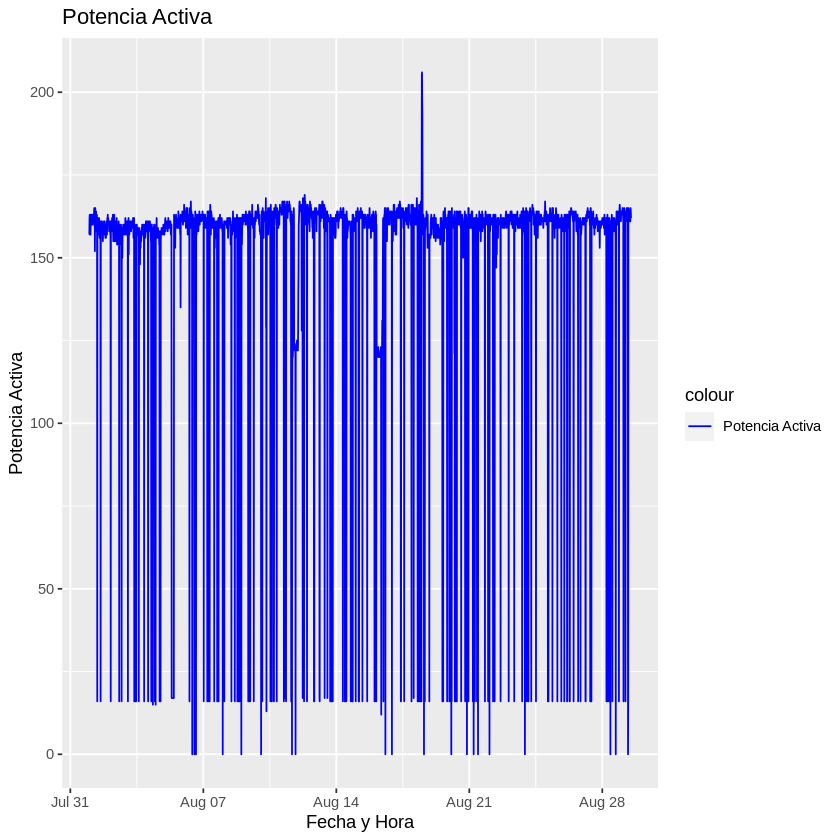

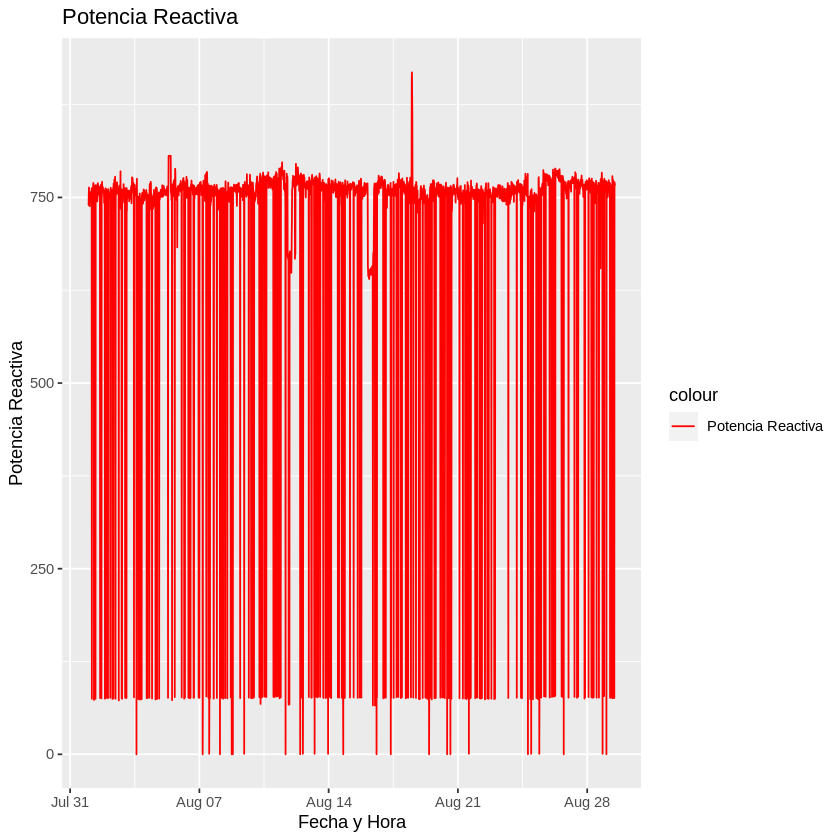

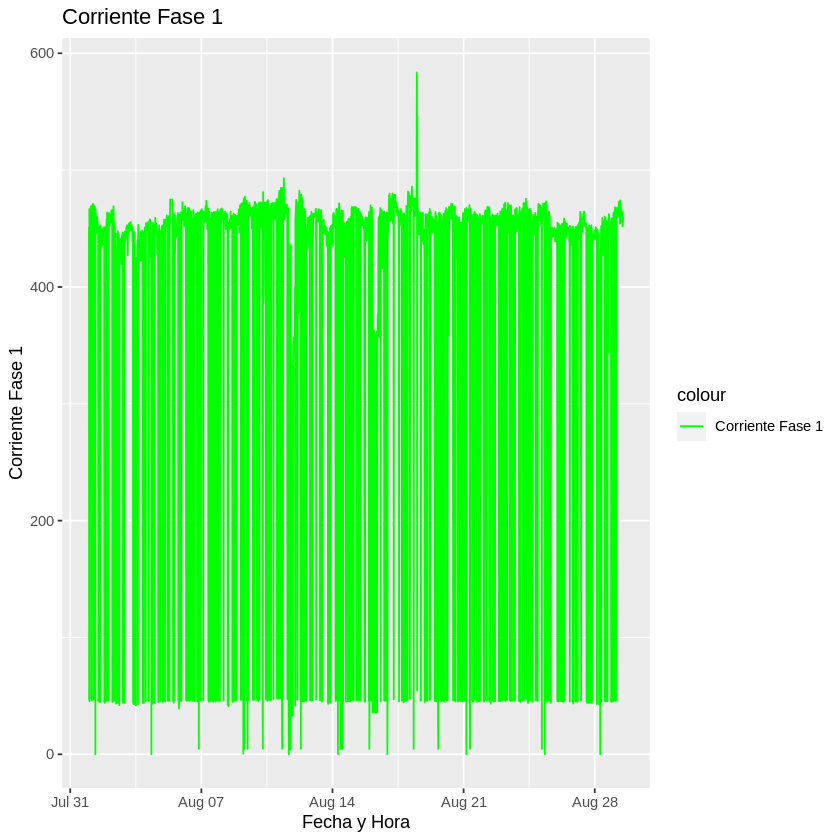

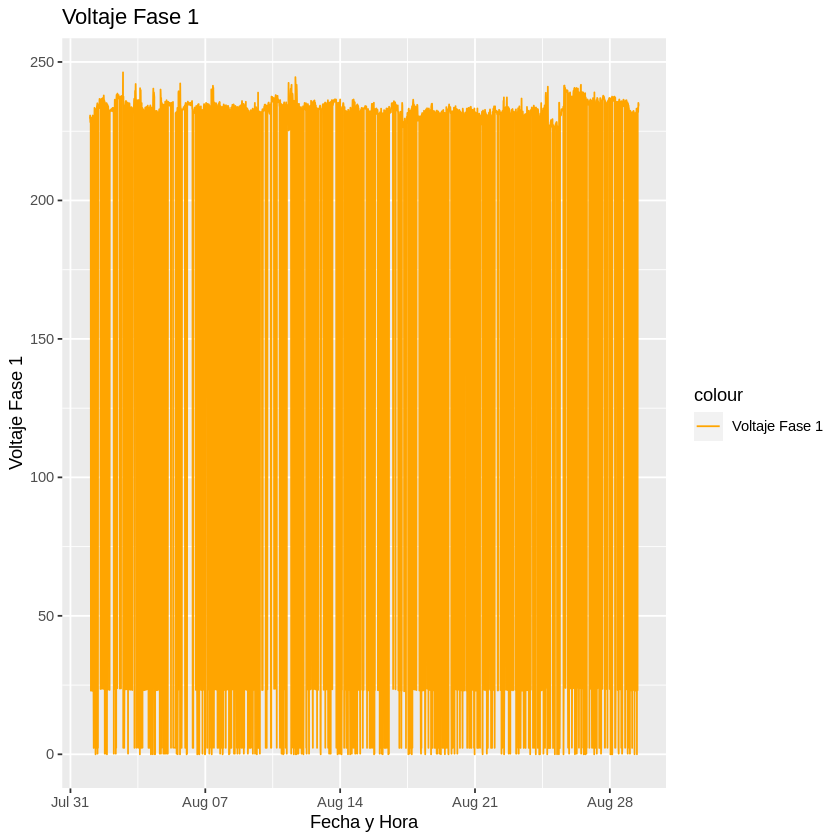

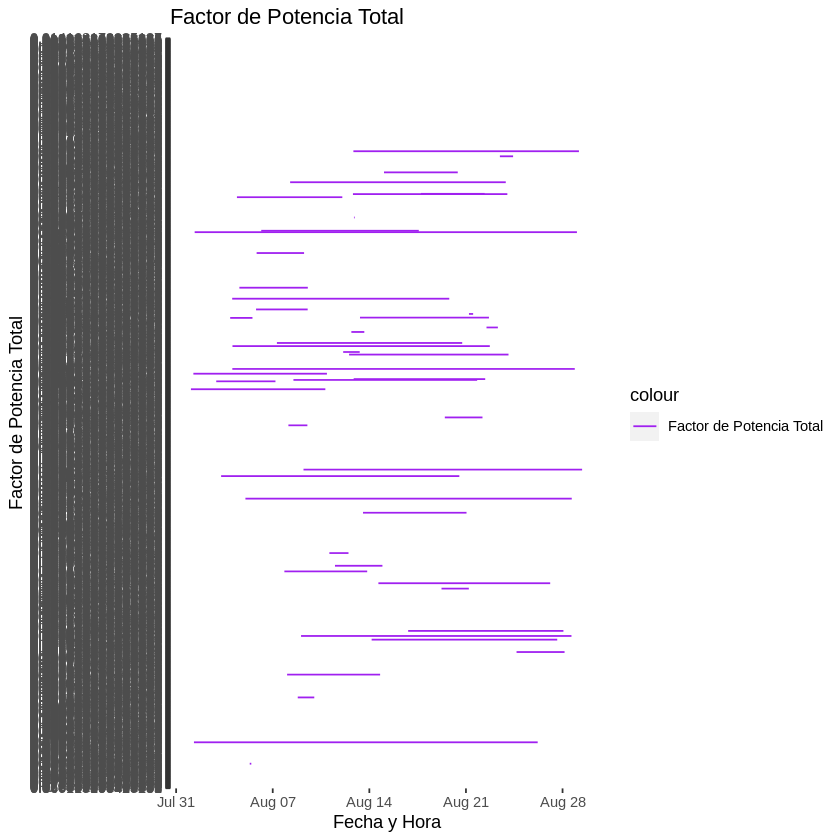

In [ ]:
# Instala y carga el paquete ggplot2 si es necesario
if (!require(ggplot2)) {
  install.packages("ggplot2")
  library(ggplot2)
}

# Convierte la columna Date.Time a formato de fecha y hora
datos$Date.Time <- as.POSIXct(datos$Date.Time, format = "%d-%m-%Y %H:%M")

# Graficar Potencia Activa en función de Date.Time con color azul
ggplot(datos, aes(x = Date.Time, y = Potencia.Activa, color = "Potencia Activa")) +
  geom_line() +
  labs(title = "Potencia Activa", x = "Fecha y Hora", y = "Potencia Activa") +
  scale_color_manual(values = "blue")

# Graficar Potencia Reactiva en función de Date.Time con color rojo
ggplot(datos, aes(x = Date.Time, y = Potencia.reactiva, color = "Potencia Reactiva")) +
  geom_line() +
  labs(title = "Potencia Reactiva", x = "Fecha y Hora", y = "Potencia Reactiva") +
  scale_color_manual(values = "red")

# Graficar Corriente Fase 1 en función de Date.Time con color verde
ggplot(datos, aes(x = Date.Time, y = Corriente.fase.1, color = "Corriente Fase 1")) +
  geom_line() +
  labs(title = "Corriente Fase 1", x = "Fecha y Hora", y = "Corriente Fase 1") +
  scale_color_manual(values = "green")

# Graficar Voltaje Fase 1 en función de Date.Time con color naranja
ggplot(datos, aes(x = Date.Time, y = Voltaje.fase.1, color = "Voltaje Fase 1")) +
  geom_line() +
  labs(title = "Voltaje Fase 1", x = "Fecha y Hora", y = "Voltaje Fase 1") +
  scale_color_manual(values = "orange")

# Graficar Factor de Potencia Total en función de Date.Time con color morado
ggplot(datos, aes(x = Date.Time, y = Factor.de.potencia.total, color = "Factor de Potencia Total")) +
  geom_line() +
  labs(title = "Factor de Potencia Total", x = "Fecha y Hora", y = "Factor de Potencia Total") +
  scale_color_manual(values = "purple")


Se realiza la regresión lineal para los siguientes datos:

Potencia activa vs Potencia Reactiva
Potencia activa vs Corriente de Fase 1
Potencia activa vs Voltaje de Fase 1
Potencia activa vs Fator de Potencia Total

In [ ]:
# Realizar regresión lineal para Potencia Activa vs Potencia Reactiva
reg_potencia_reactiva <- lm(Potencia.Activa ~ Potencia.reactiva, data = datos)

# Realizar regresión lineal para Potencia Activa vs Corriente Fase 1
reg_corriente_fase1 <- lm(Potencia.Activa ~ Corriente.fase.1, data = datos)

# Realizar regresión lineal para Potencia Activa vs Voltaje Fase 1
reg_voltaje_fase1 <- lm(Potencia.Activa ~ Voltaje.fase.1, data = datos)

# Realizar regresión lineal para Potencia Activa vs Factor de Potencia Total
reg_factor_potencia <- lm(Potencia.Activa ~ Factor.de.potencia.total, data = datos)


Se realiza regresión linea para Potencia Activa vs Voltaje de Fase 1

In [ ]:
# Realizar regresión lineal para Potencia Activa vs Voltaje Fase 1
reg_potencia_voltaje <- lm(Potencia.Activa ~ Voltaje.fase.1, data = datos)

# Mostrar el resumen de la regresión
summary(reg_potencia_voltaje)



Call:
lm(formula = Potencia.Activa ~ Voltaje.fase.1, data = datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-150.981    8.075   10.765   12.059   55.044 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.490e+02  1.514e+00  98.464   <2e-16 ***
Voltaje.fase.1 8.186e-03  7.459e-03   1.097    0.273    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37.1 on 2717 degrees of freedom
Multiple R-squared:  0.0004431,	Adjusted R-squared:  7.52e-05 
F-statistic: 1.204 on 1 and 2717 DF,  p-value: 0.2725


In [ ]:
# Calcular el coeficiente de correlación entre Potencia.Activa y Voltaje.fase.1
correlation <- cor(datos$Potencia.Activa, datos$Voltaje.fase.1)

# Mostrar el coeficiente de correlación
cat("Coeficiente de correlación:", correlation, "\n")


Coeficiente de correlación: 0.02104979 


A continuación se entrega el código para graficar las distintas variables con los datos obtenidos a partir de la regresión lineal.

`geom_smooth()` using formula = 'y ~ x'


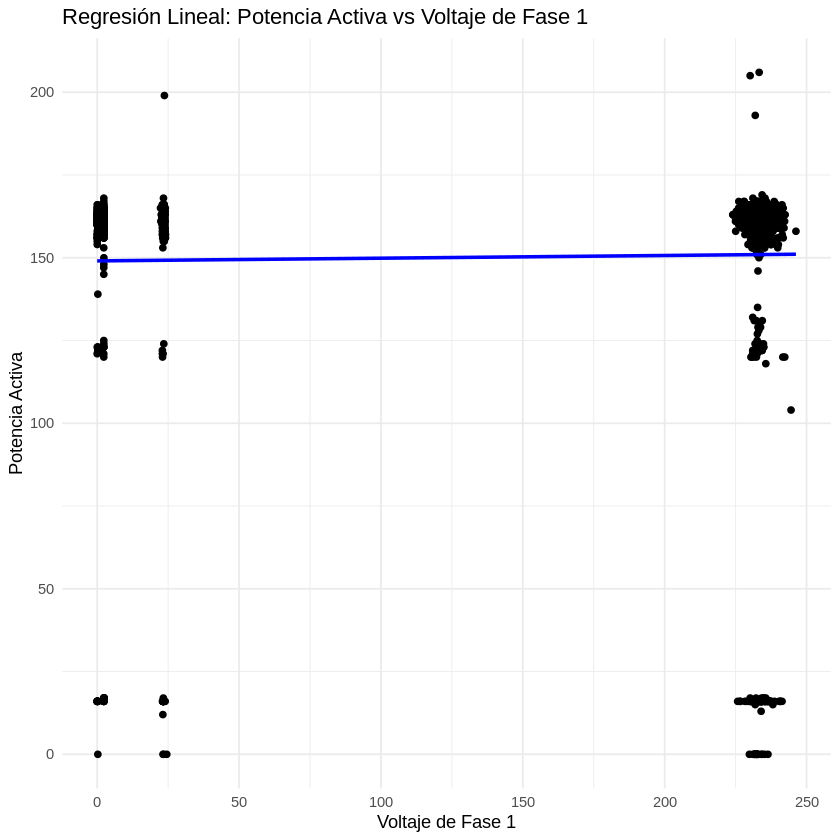

In [ ]:
# Cargar el paquete ggplot2 si es necesario
if (!require(ggplot2)) {
  install.packages("ggplot2")
  library(ggplot2)
}

# Graficar Potencia Activa vs Voltaje de Fase 1 con la recta de regresión
ggplot(datos, aes(x = Voltaje.fase.1, y = Potencia.Activa)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Regresión Lineal: Potencia Activa vs Voltaje de Fase 1",
       x = "Voltaje de Fase 1", y = "Potencia Activa") +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


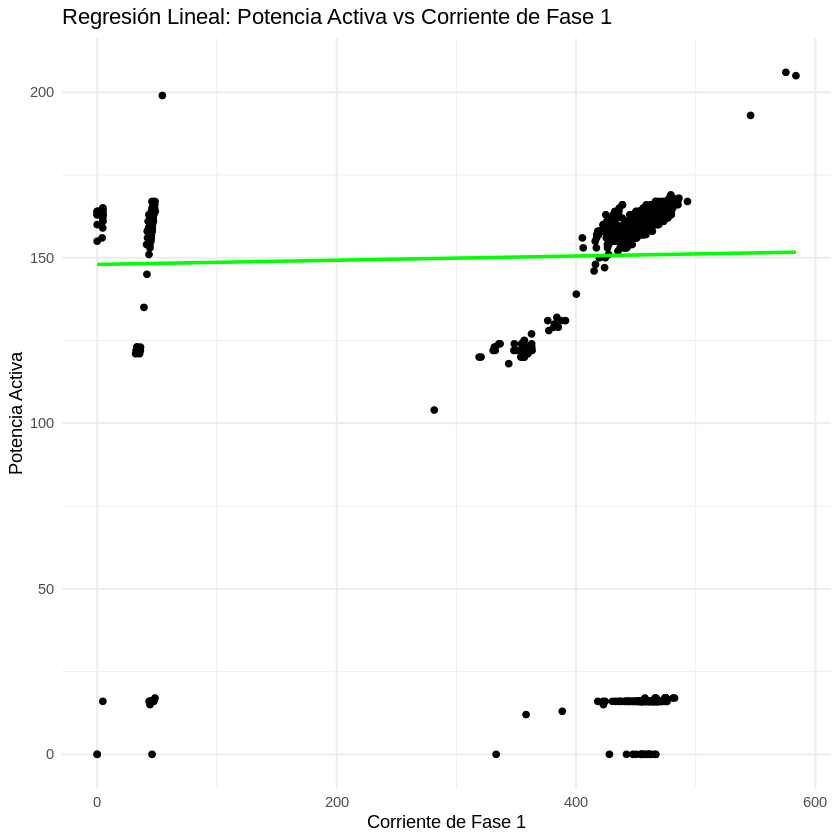

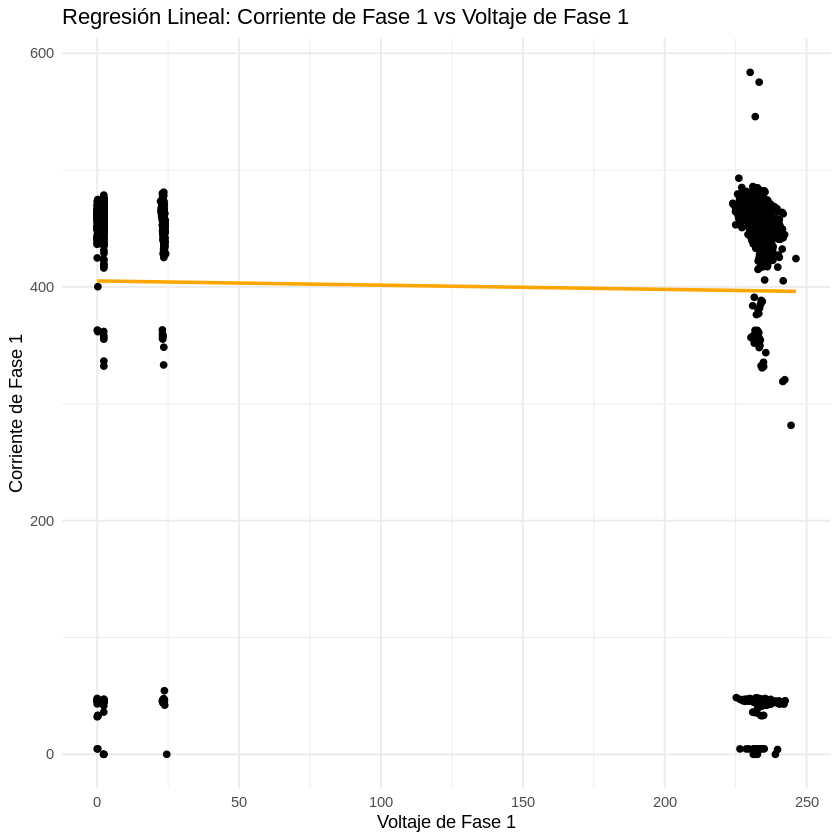

In [ ]:
# Cargar el paquete ggplot2 si es necesario
if (!require(ggplot2)) {
  install.packages("ggplot2")
  library(ggplot2)
}

# Graficar Potencia Activa vs Corriente de Fase 1 con la recta de regresión
ggplot(datos, aes(x = Corriente.fase.1, y = Potencia.Activa)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "green") +
  labs(title = "Regresión Lineal: Potencia Activa vs Corriente de Fase 1",
       x = "Corriente de Fase 1", y = "Potencia Activa") +
  theme_minimal()

# Graficar Corriente de Fase 1 vs Voltaje de Fase 1 con la recta de regresión
ggplot(datos, aes(x = Voltaje.fase.1, y = Corriente.fase.1)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "orange") +
  labs(title = "Regresión Lineal: Corriente de Fase 1 vs Voltaje de Fase 1",
       x = "Voltaje de Fase 1", y = "Corriente de Fase 1") +
  theme_minimal()


El siguiente código genera cinco diagramas de dispersión, uno para cada relación entre las variables para hacer una comparación con las regresiones anteriores y sus gráficas. Cada gráfica incluye los puntos de datos correspondientes.

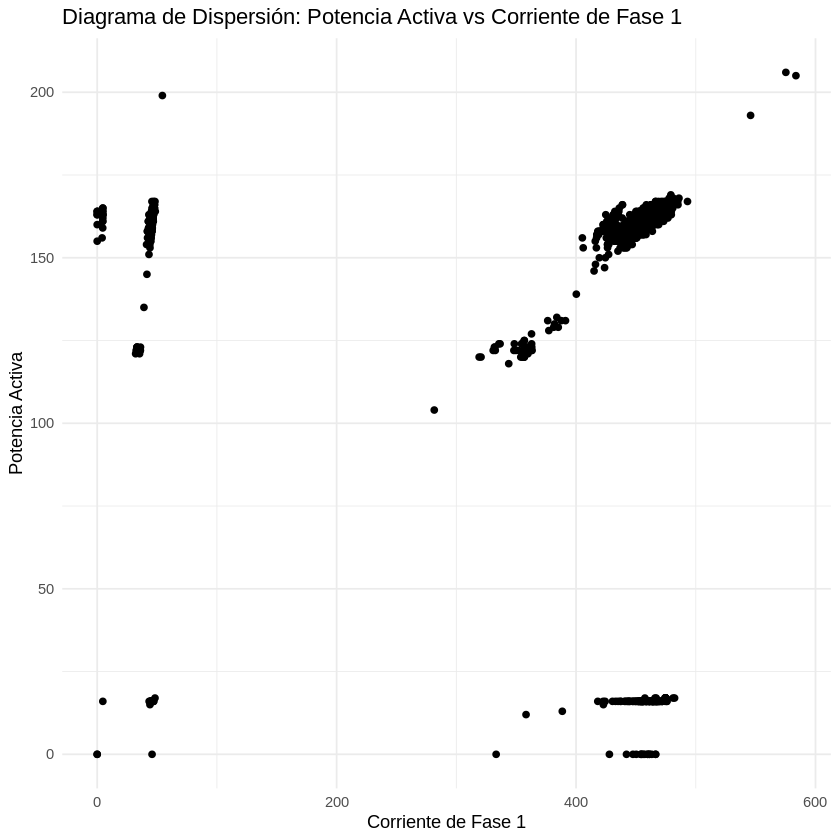

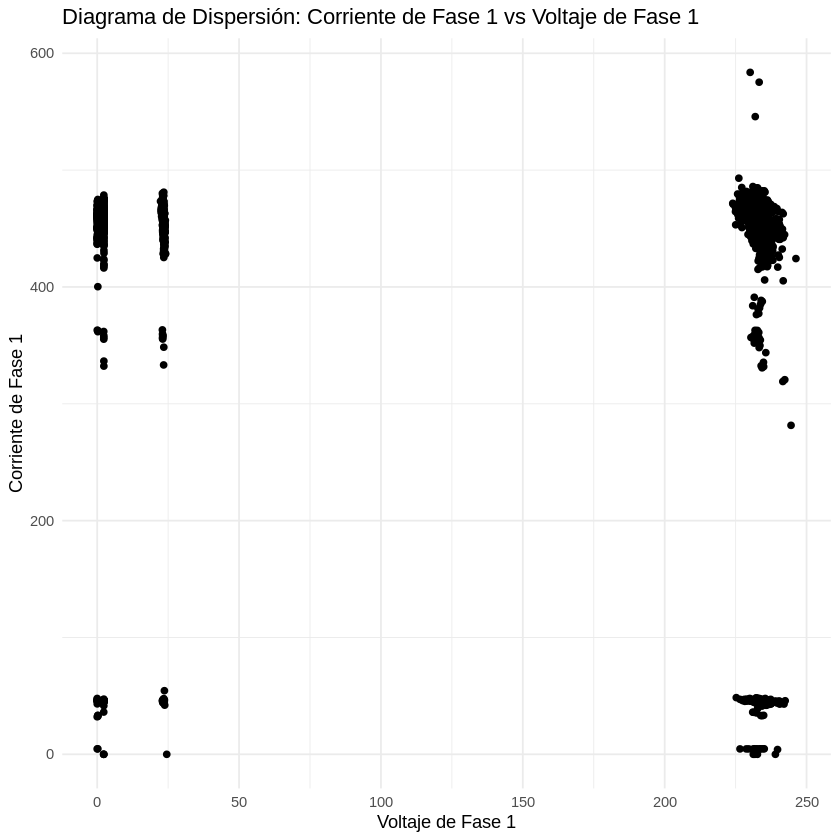

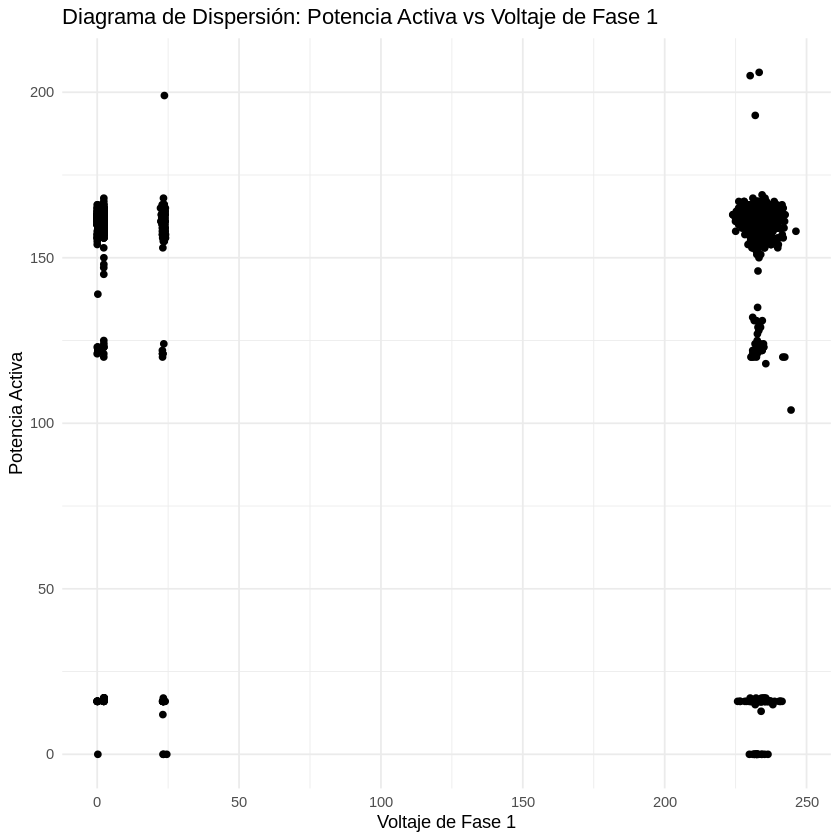

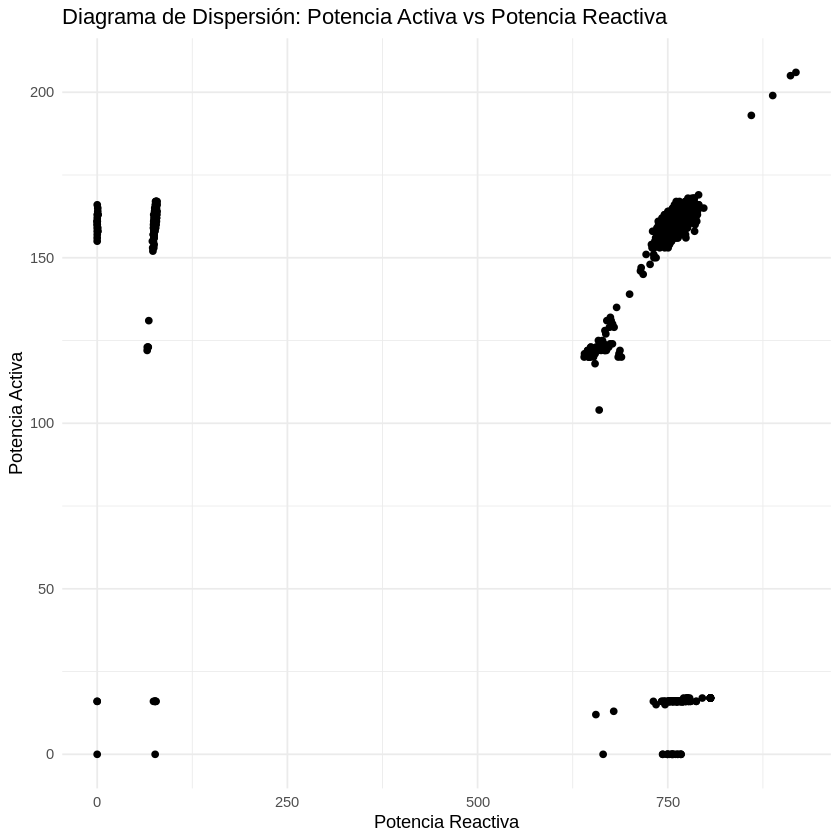

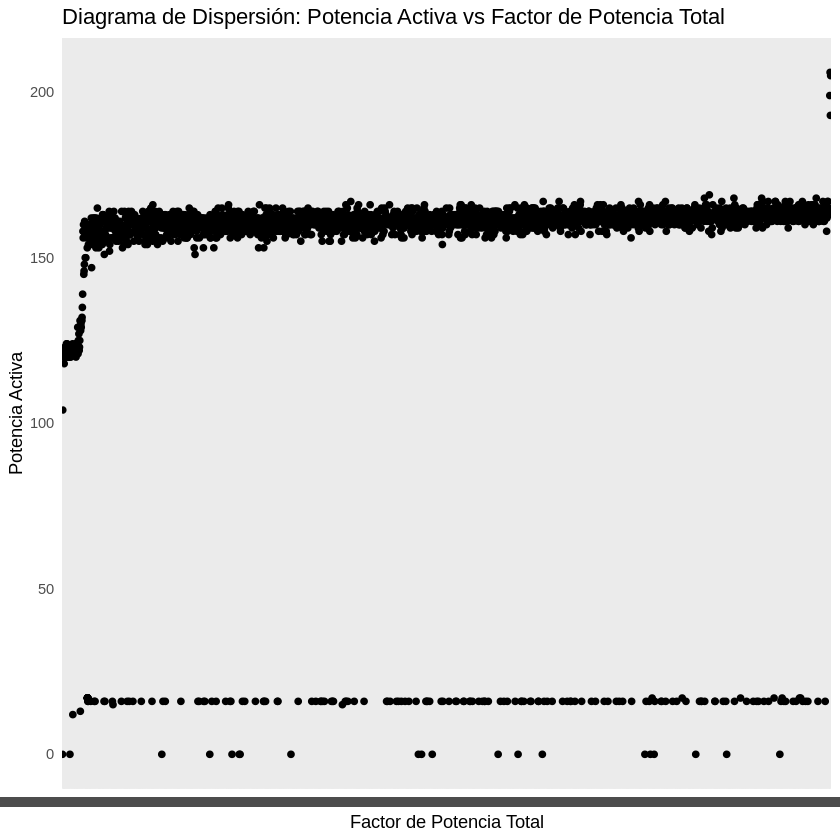

In [ ]:
# Graficar diagrama de dispersión de Potencia Activa vs Corriente de Fase 1
ggplot(datos, aes(x = Corriente.fase.1, y = Potencia.Activa)) +
  geom_point() +
  labs(title = "Diagrama de Dispersión: Potencia Activa vs Corriente de Fase 1",
       x = "Corriente de Fase 1", y = "Potencia Activa") +
  theme_minimal()

# Graficar diagrama de dispersión de Corriente de Fase 1 vs Voltaje de Fase 1
ggplot(datos, aes(x = Voltaje.fase.1, y = Corriente.fase.1)) +
  geom_point() +
  labs(title = "Diagrama de Dispersión: Corriente de Fase 1 vs Voltaje de Fase 1",
       x = "Voltaje de Fase 1", y = "Corriente de Fase 1") +
  theme_minimal()

# Graficar diagrama de dispersión de Potencia Activa vs Voltaje de Fase 1
ggplot(datos, aes(x = Voltaje.fase.1, y = Potencia.Activa)) +
  geom_point() +
  labs(title = "Diagrama de Dispersión: Potencia Activa vs Voltaje de Fase 1",
       x = "Voltaje de Fase 1", y = "Potencia Activa") +
  theme_minimal()

# Graficar diagrama de dispersión de Potencia Activa vs Potencia Reactiva
ggplot(datos, aes(x = Potencia.reactiva, y = Potencia.Activa)) +
  geom_point() +
  labs(title = "Diagrama de Dispersión: Potencia Activa vs Potencia Reactiva",
       x = "Potencia Reactiva", y = "Potencia Activa") +
  theme_minimal()

# Graficar diagrama de dispersión de Potencia Activa vs Factor de Potencia Total
ggplot(datos, aes(x = Factor.de.potencia.total, y = Potencia.Activa)) +
  geom_point() +
  labs(title = "Diagrama de Dispersión: Potencia Activa vs Factor de Potencia Total",
       x = "Factor de Potencia Total", y = "Potencia Activa") +
  theme_minimal()


En la siguiente parte se realizará una regresión multidimensional, teniendo como Potencia Reactiva como respuesta en función de la Potencia Activa, Corriente de fase 1, Voltaje de Fase 1

In [ ]:
# Realizar regresión múltiple
modelo <- lm(Potencia.reactiva ~ Potencia.Activa + Corriente.fase.1 + Voltaje.fase.1, data = datos)

# Resumen del modelo
summary(modelo)



Call:
lm(formula = Potencia.reactiva ~ Potencia.Activa + Corriente.fase.1 + 
    Voltaje.fase.1, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-717.78   54.46   65.79   74.73  234.18 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      716.64435   20.65478  34.696   <2e-16 ***
Potencia.Activa   -0.14796    0.10480  -1.412    0.158    
Corriente.fase.1  -0.02204    0.02736  -0.806    0.421    
Voltaje.fase.1     0.04621    0.04076   1.134    0.257    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 202.6 on 2715 degrees of freedom
Multiple R-squared:  0.001458,	Adjusted R-squared:  0.0003546 
F-statistic: 1.321 on 3 and 2715 DF,  p-value: 0.2656


Se deja una explicación de los datos entregados por R

**Residuals:**
- Min: El valor mínimo de los residuos (diferencia entre los valores reales y los predichos por el modelo).
- 1Q: El primer cuartil de los residuos, que representa el valor por debajo del cual cae el 25% de los residuos más pequeños.
- Median: La mediana de los residuos, que es el valor que divide los residuos en dos mitades iguales.
- 3Q: El tercer cuartil de los residuos, que representa el valor por debajo del cual cae el 75% de los residuos más pequeños.
- Max: El valor máximo de los residuos.

**Coefficients:**
- Estimate: El valor estimado del coeficiente para cada variable en el modelo. Por ejemplo, para la variable Potencia.Activa, el valor estimado del coeficiente es -0.14796.
- Std. Error: El error estándar de cada coeficiente estimado.
- t value: El valor t calculado para probar la hipótesis nula de que el coeficiente es igual a cero.
- Pr(>|t|): El valor p asociado al valor t, que indica la probabilidad de obtener un valor t tan extremo o más extremo si la hipótesis nula es verdadera. Valores bajos indican que el coeficiente es significativamente diferente de cero.

**Residual standard error:**
- El error estándar residual, que es una medida de la dispersión de los residuos. Cuanto más pequeño sea este valor, mejor se ajusta el modelo a los datos.

**Multiple R-squared:**
- El coeficiente de determinación (R-cuadrado múltiple), que indica la proporción de la variabilidad total de la variable de respuesta explicada por las variables predictoras en el modelo.

**Adjusted R-squared:**
- El R-cuadrado ajustado, que es una versión corregida del R-cuadrado que toma en cuenta la cantidad de variables predictoras en el modelo y ajusta por el número de grados de libertad.

**F-statistic:**
- El valor F calculado para probar la significancia global del modelo. Un valor F alto y un valor p bajo indican que al menos una de las variables predictoras es significativa en el modelo.

En resumen, este resultado proporciona información sobre la significancia y la relación entre las variables predictoras y la variable de respuesta en el contexto de la regresión lineal.

A continuación se entregará el código y resultados para las regresiones polinómicas para voltaje, corriente, potencia activa, reactiva de la base de datos entregada

In [ ]:
library(ggplot2)

# Realiza una regresión polinómica para Voltaje de fase 1
modelo_voltaje <- lm(Voltaje.fase.1 ~ poly(Date.Time, degree = 2), data = datos)

# Realiza una regresión polinómica para Corriente de fase 1
modelo_corriente <- lm(Corriente.fase.1 ~ poly(Date.Time, degree = 2), data = datos)

# Realiza una regresión polinómica para Potencia Activa
modelo_potencia_activa <- lm(Potencia.Activa ~ poly(Date.Time, degree = 2), data = datos)

# Realiza una regresión polinómica para Potencia Reactiva
modelo_potencia_reactiva <- lm(Potencia.reactiva ~ poly(Date.Time, degree = 2), data = datos)


A continuación de muestran los resultados de los gráficos de las regresiones polinómicas

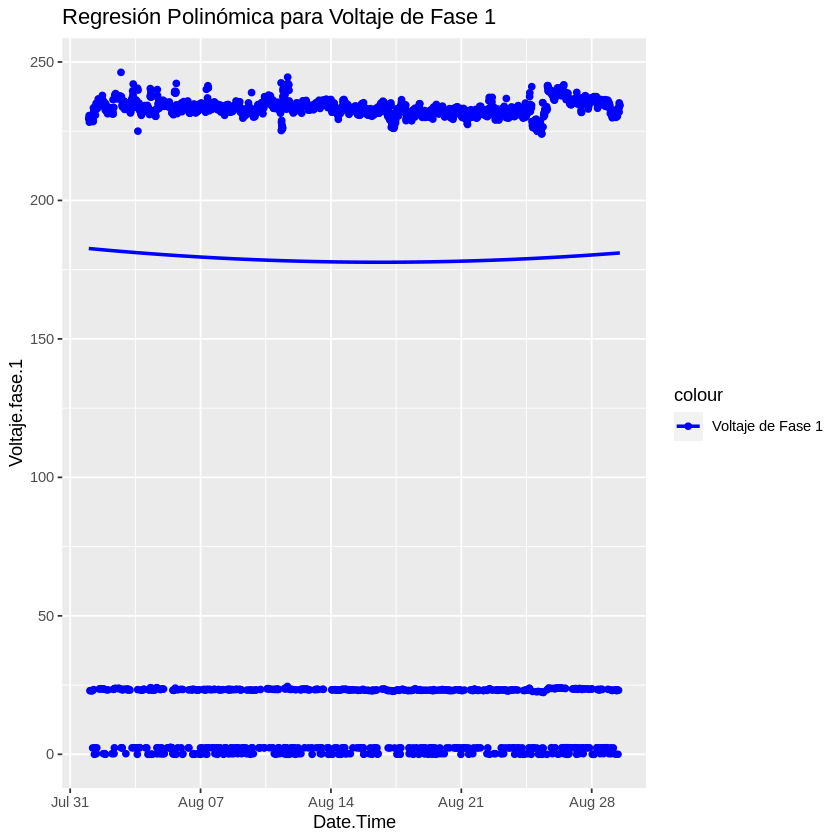

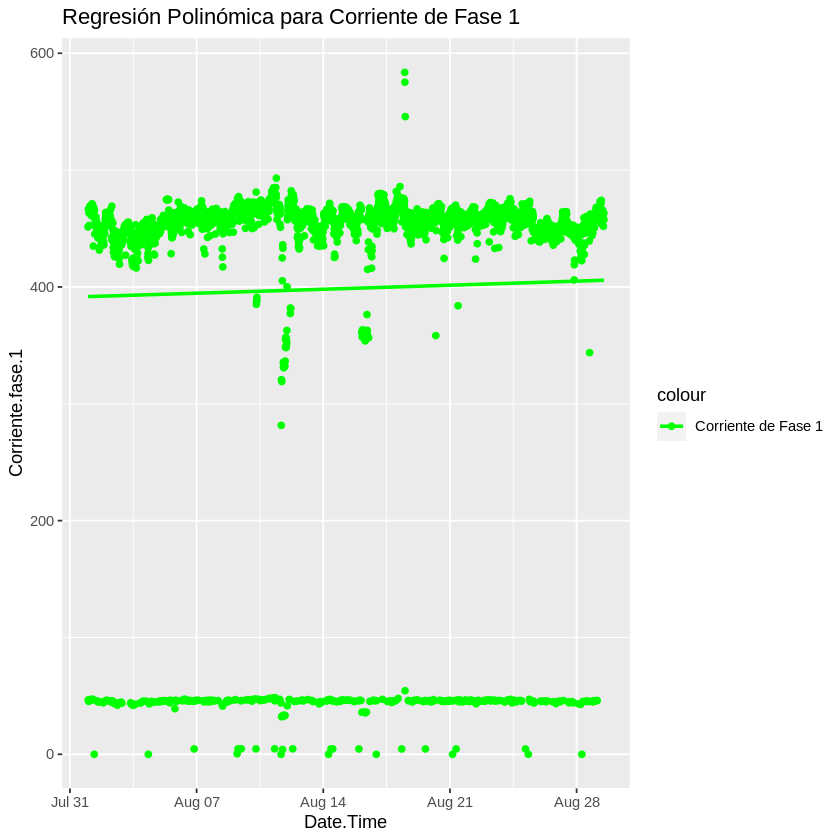

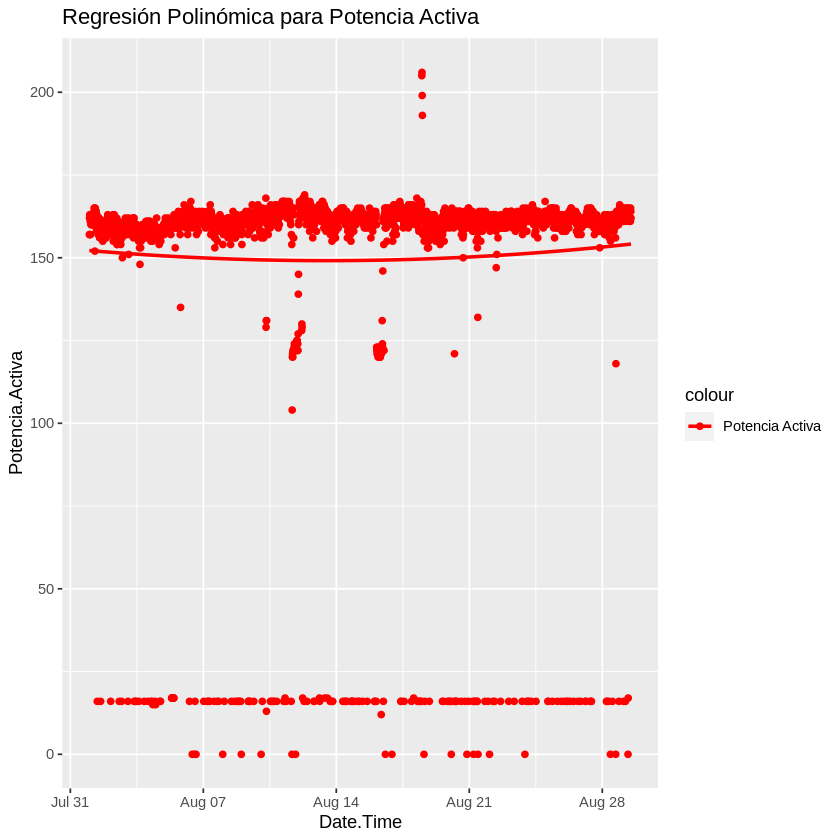

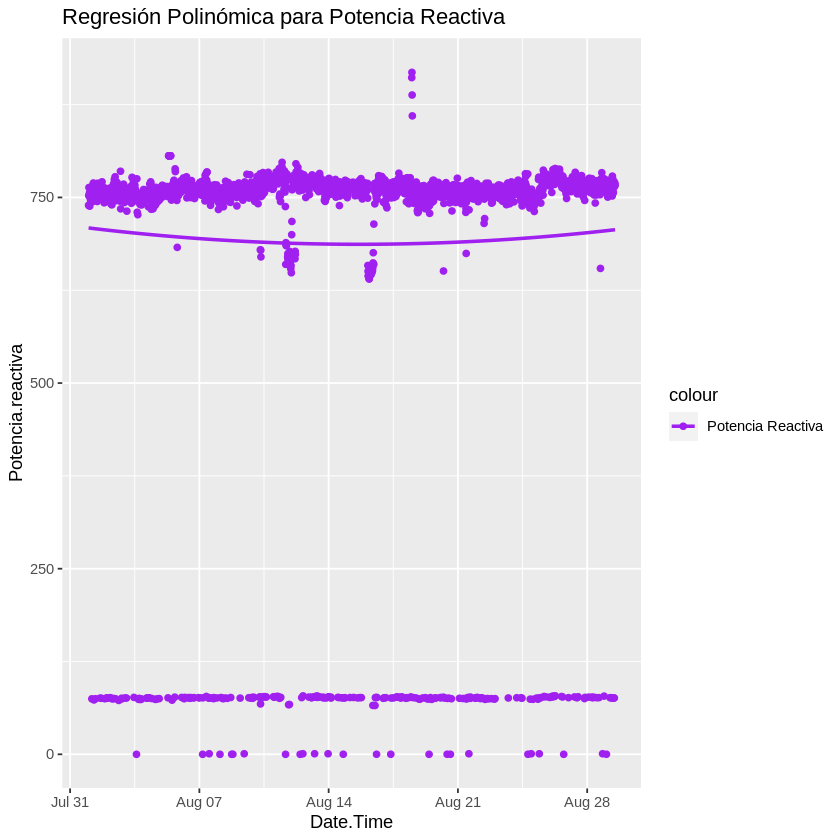

In [ ]:
# Carga los paquetes necesarios
library(ggplot2)

# Realiza una regresión polinómica para Voltaje de fase 1
modelo_voltaje <- lm(Voltaje.fase.1 ~ poly(Date.Time, degree = 2), data = datos)

# Realiza una regresión polinómica para Corriente de fase 1
modelo_corriente <- lm(Corriente.fase.1 ~ poly(Date.Time, degree = 2), data = datos)

# Realiza una regresión polinómica para Potencia Activa
modelo_potencia_activa <- lm(Potencia.Activa ~ poly(Date.Time, degree = 2), data = datos)

# Realiza una regresión polinómica para Potencia Reactiva
modelo_potencia_reactiva <- lm(Potencia.reactiva ~ poly(Date.Time, degree = 2), data = datos)

# Gráficos de dispersión con ajuste polinómico para todas las variables
ggplot(datos, aes(x = Date.Time, y = Voltaje.fase.1, color = "Voltaje de Fase 1")) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE) +
  labs(title = "Regresión Polinómica para Voltaje de Fase 1") +
  scale_color_manual(values = "blue")

ggplot(datos, aes(x = Date.Time, y = Corriente.fase.1, color = "Corriente de Fase 1")) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE) +
  labs(title = "Regresión Polinómica para Corriente de Fase 1") +
  scale_color_manual(values = "green")

ggplot(datos, aes(x = Date.Time, y = Potencia.Activa, color = "Potencia Activa")) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE) +
  labs(title = "Regresión Polinómica para Potencia Activa") +
  scale_color_manual(values = "red")

ggplot(datos, aes(x = Date.Time, y = Potencia.reactiva, color = "Potencia Reactiva")) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE) +
  labs(title = "Regresión Polinómica para Potencia Reactiva") +
  scale_color_manual(values = "purple")


Aplicación de Ridge y Lasso en R junto con el código

In [ ]:
install.packages("glmnet")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’




In [ ]:
library(glmnet)


Loading required package: Matrix

Loaded glmnet 4.1-8



In [ ]:
# Carga el paquete necesario
library(glmnet)

# Preparación de los datos
x <- model.matrix(Potencia.Activa ~ . - 1, data = datos)
y <- datos$Potencia.Activa

# Aplica Ridge y Lasso con validación cruzada
ridge_model <- cv.glmnet(x, y, alpha = 0)  # Ridge (L2)
lasso_model <- cv.glmnet(x, y, alpha = 1)  # Lasso (L1)

# Muestra el valor óptimo del hiperparámetro lambda para Ridge y Lasso
print(ridge_model$lambda.min)
print(lasso_model$lambda.min)

# Obtén los coeficientes para Ridge y Lasso
ridge_coefs <- coef(ridge_model, s = "lambda.min")
lasso_coefs <- coef(lasso_model, s = "lambda.min")


[1] 84.8525
[1] 2.41663
